<a href="https://colab.research.google.com/github/daniel-usp/MachineLearning/blob/main/DecisionTree/DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árvores de Decisão

## Introdução às Árvores de Decisão

As **Árvores de Decisão** são um método popular de aprendizado de máquina supervisionado. Elas são usadas para classificação e regressão, fornecendo modelos intuitivos e fáceis de interpretar. Uma árvore de decisão é uma estrutura em forma de árvore, onde cada nó interno representa um "teste" em um atributo, cada ramo representa o resultado do teste, e cada nó folha representa uma classe ou valor de decisão.

## Aplicações em Diferentes Setores

### Setor Financeiro
- **Avaliação de Crédito**: Avaliar se um empréstimo deve ser concedido ou não, com base em critérios como histórico de crédito, renda e dívida.
- **Investimento em Ações**: Prever se o preço de uma ação vai subir ou descer, baseando-se em fatores como desempenho financeiro da empresa e tendências do mercado.

### Marketing
- **Segmentação de Clientes**: Dividir os clientes em grupos com base em características como histórico de compras e preferências.
- **Campanhas de Marketing Direcionadas**: Decidir quais clientes são mais propensos a responder positivamente a uma determinada campanha.

### Setor de Saúde
- **Diagnóstico Médico**: Auxiliar na decisão de diagnósticos com base em sintomas e resultados de exames.
- **Gestão de Pacientes**: Identificar pacientes com maior risco de desenvolver certas condições.

## Conceitos Principais

- **Nó Raiz**: O nó no topo da árvore que realiza a primeira decisão.
- **Nós Internos**: Representam decisões adicionais baseadas nos valores dos atributos.
- **Ramos**: Correspondem aos resultados de um teste e conectam os nós.
- **Nós Folhas**: Representam as previsões finais ou os resultados da árvore.

### Vantagens e Desvantagens

#### Vantagens
- **Interpretabilidade**: Fácil de entender e interpretar, mesmo para pessoas sem conhecimento técnico.
- **Não requer grande preparação de dados**: Não necessita de normalização ou escalonamento dos dados.

#### Desvantagens
- **Tendência ao Overfitting**: Pode criar modelos muito complexos que não generalizam bem para novos dados.
- **Sensibilidade a Variações nos Dados**: Pequenas variações nos dados podem resultar em árvores de decisão muito diferentes.

Árvores de decisão são uma ferramenta poderosa e versátil para uma variedade de aplicações de aprendizado de máquina, especialmente úteis quando a interpretabilidade do modelo é uma consideração importante.



In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

#Banco de Dados Geral
dados = pd.read_excel('https://github.com/daniel-usp/Curso/raw/main/DecisionTree/assinatura.xlsx')
dados





,idade,temp_cli,linhas,renda,temp_rsd,tvcabo,premiere,fatura
0,51,26,4,5320.0,7.3,1,0,543
1,36,16,2,5620.0,4.5,1,0,482
2,35,15,1,4860.0,4.8,0,0,593
3,40,22,1,6590.0,6.2,1,0,1184
4,52,30,1,6370.0,2.2,0,0,634
...,...,...,...,...,...,...,...,...
1995,31,15,4,10170.0,1.5,0,1,625
1996,37,18,4,12230.0,4.6,1,1,4322
1997,29,12,5,5590.0,6.7,1,0,517
1998,34,14,1,4760.0,6.9,1,0,528


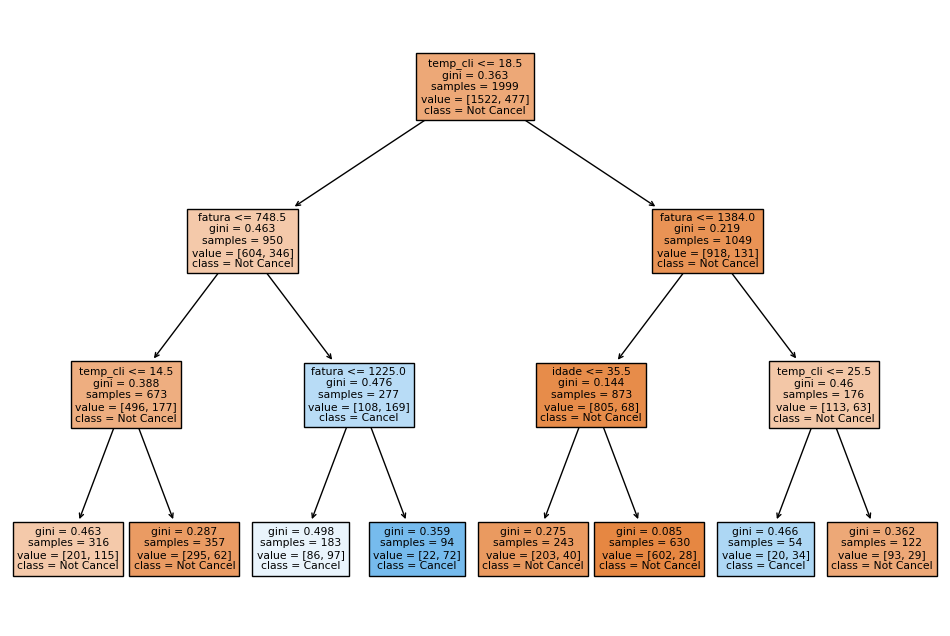

Acurácia: 0.785
Matriz de Confusão:
 [[440  17]
 [112  31]]


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Carregar dados
dados = pd.read_excel('https://github.com/daniel-usp/MachineLearning/raw/main/04%20-%20DecisionTrees/assinatura.xlsx')

# Supondo que 'cancel' é a variável dependente
X = dados.drop('cancel', axis=1)
y = dados['cancel']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Construir a árvore de decisão
model = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=8, random_state=42)
model.fit(X_train, y_train)

# Avaliar o modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotar a árvore
model.fit(X,y)
plt.figure(figsize=(12,8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Not Cancel', 'Cancel'])
plt.show()

# Exibir a acurácia e a matriz de confusão
print("Acurácia:", accuracy)
print("Matriz de Confusão:\n", conf_matrix)



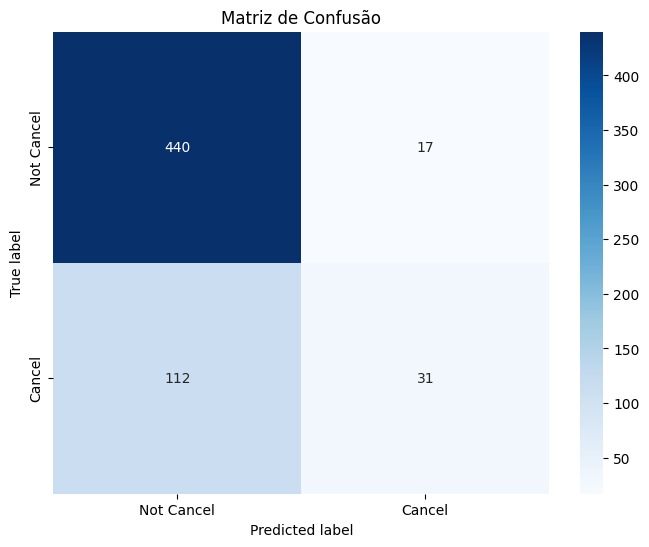

Recall: 0.21678321678321677
Precision: 0.6458333333333334


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, recall_score, precision_score

# Supondo que y_test são os rótulos verdadeiros e y_pred são as previsões do modelo
conf_matrix = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Cancel', 'Cancel'], yticklabels=['Not Cancel', 'Cancel'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Matriz de Confusão')
plt.show()

# Mostrando recall e precision
print("Recall:", recall)
print("Precision:", precision)



In [ ]:
#Separar em amostra treino e teste pelo sklearn

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier


# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Cria um objeto do classificador DecisionTree
model = DecisionTreeClassifier(random_state=42)

# Treina o classificador com o conjunto de treinamento
model.fit(X_train, y_train)

# Calcula os cross validation scores
scores = cross_val_score(model, x, y, cv=5)

# Printa os scores
print('Cross-validation scores: ', scores)

# Printa a média dos scores
print('Average cross-validation score: ', scores.mean())



Cross-validation scores:  [0.71  0.74  0.725 0.715 0.69 ]
Average cross-validation score:  0.716


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

#Criação do modelo
modelo = DecisionTreeClassifier()
resultado = cross_val_score(modelo, x,y, cv = 5)

#Imprimindo a acurácia
print(resultado.mean())



0.7250000000000001


In [ ]:
y.unique()

array([0, 1])

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

In [ ]:
import io
import graphviz
from sklearn.tree import export_graphviz

# Ajustando o modelo
modelo.fit(x, y)

# Gerando o gráfico da árvore de decisão:
features = x.columns
class_names = ['y=0', 'y=1']  # Rótulos das classes alvo

dot_data = io.StringIO()
export_graphviz(modelo, out_file=dot_data, feature_names=features, class_names=class_names, filled=True, proportion=True)

graph = graphviz.Source(dot_data.getvalue())
graph.view()


'Source.gv.pdf'

In [ ]:
valores = y.unique()
valores

array([0, 1])

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV

#Definindo os valores que serão testados em DecisionTree:
minimos_split = np.array([2,3,4,5,6,7,8])
maximo_nivel = np.array([3,4,5,6,7,8,9])
algoritmo = ['gini']
valores_grid = {'min_samples_split': minimos_split, 'max_depth': maximo_nivel, 'criterion': algoritmo}

#Criação do Modelo
modelo = DecisionTreeClassifier()

#Criando os grids
gridDecisionTree = GridSearchCV(estimator = modelo, param_grid = valores_grid, cv = 5)
gridDecisionTree.fit(x,y)

#Imprimindo os melhores parâmetros
print("Mínimo split: ", gridDecisionTree.best_estimator_.min_samples_split)
print("Máxima profundidade: ", gridDecisionTree.best_estimator_.max_depth)
print("Critério: ", gridDecisionTree.best_estimator_.criterion)
print("Acurácia: ", gridDecisionTree.best_score_)


Mínimo split:  2
Máxima profundidade:  3
Critério:  gini
Acurácia:  0.783


In [ ]:
import io
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

# Ajuste do melhor modelo
melhor_modelo = DecisionTreeClassifier(min_samples_split = gridDecisionTree.best_estimator_.min_samples_split,
                                      max_depth = gridDecisionTree.best_estimator_.max_depth)
melhor_modelo.fit(x, y)

# Gerando o gráfico da árvore de decisão:
features = x.columns
class_names = ['Not Cancel', 'Cancel']  # Rótulos das classes alvo

dot_data = io.StringIO()
export_graphviz(melhor_modelo, out_file=dot_data, feature_names=features, class_names=class_names, filled=True, proportion=True)

graph = graphviz.Source(dot_data.getvalue())
graph.view()


'Source.gv.pdf'

In [ ]:
dados = [[50,20,100,5000,20,1,0,500],[60,10,200,4000,20,1,0,50]]

melhor_modelo.predict(dados)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0, 0])